# Install Anomalib via PyPI

In [ ]:
%pip install anomalib
!anomalib install -v

To use other subcommand using `anomalib install`
Could not find anomalib. To use this feature, ensure that you have anomalib installed.
Could not find openvino. To use this feature, ensure that you have openvino installed.
To use comet logger install it using `pip install comet-ml`
To use any logger install it using `anomalib install -v`
/usr/local/lib/python3.10/dist-packages/anomalib/cli/install.py:63: UserWarning: Torch Version will be selected as 2.2.0.
  torch_install_args = get_torch_install_args(torch_requirement)
/usr/local/lib/python3.10/dist-packages/anomalib/cli/utils/installation.py:271: UserWarning: Installed CUDA version is v12.2. 
v11.8 <= Supported CUDA version <= v12.1.
This script will use CUDA v12.1.
However, this may not be safe, and you are advised to install the correct version of CUDA.
For more details, refer to https://pytorch.org/get-started/locally/
  cuda_version = update_cuda_version_with_available_torch_cuda_build(cuda_version, torch_version)
⠋ Installing p

# Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/"

/content/drive/MyDrive


# Imports

In [ ]:
from pathlib import Path

from anomalib.data.utils import read_image
from anomalib.deploy import OpenVINOInferencer

from anomalib.data import Folder
from anomalib import TaskType

from lightning.pytorch.callbacks import ModelCheckpoint, EarlyStopping

from anomalib.engine import Engine
from anomalib.utils.normalization import NormalizationMethod

from anomalib.deploy import ExportType
from matplotlib import pyplot as plt

import time
from PIL import Image
from google.colab.patches import cv2_imshow
import cv2

# PaDiM

In [ ]:
from anomalib.models import Padim

model = Padim(
    backbone="resnet18",
    pre_trained = "true",
    layers=["layer1", "layer2", "layer3"],
    n_features = None,
    # n_features = 100,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [ ]:
datamodule = Folder(
    name = "MyDataset",
    root = "./MyDataset/",
    normal_dir = "train/good",
    abnormal_dir = "test/NG",
    normal_test_dir = "test/good",
    mask_dir = "ground_truth/NG",
    image_size = (256, 256),
    normal_split_ratio = 0,
    extensions = [".png"],
    train_batch_size = 32,
    eval_batch_size = 32,
    num_workers = 2,
    task = TaskType.SEGMENTATION,
    test_split_mode = "from_dir",
    test_split_ratio = 0,
    val_split_mode = "from_test",
    val_split_ratio = 0.3,
    seed = None,
)

In [ ]:
engine = Engine(
    normalization = NormalizationMethod.MIN_MAX,
    threshold = "F1AdaptiveThreshold",
    task = TaskType.SEGMENTATION,
    pixel_metrics = ["AUROC"],
    accelerator = "auto",
    check_val_every_n_epoch = 1,
    devices = 1,
    max_epochs = 1,
    num_sanity_val_steps = 0,
    val_check_interval = 1.0,
)

In [ ]:
engine.fit(model = model, datamodule = datamodule)

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: `Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
INFO:lightning.pytorch.utilities.rank_zero:`Trainer(val_check_interval=1.0)` was config

┏━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name                  ┃ Type                     ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model                 │ PadimModel               │  2.8 M │ train │
│ 1 │ _transform            │ Compose                  │      0 │ train │
│ 2 │ normalization_metrics │ MinMax                   │      0 │ train │
│ 3 │ image_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 4 │ pixel_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 5 │ image_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 6 │ pixel_metrics         │ AnomalibMetricCollection │      0 │ train │
└───┴───────────────────────┴──────────────────────────┴────────┴───────┘

Trainable params: 2.8 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 2.8 M                                                                                                
Total estimated model params size (MB): 11

Output()

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/optimization/automatic.py:132: `training_step` 
returned `None`. If this was on purpose, ignore this warning...

/usr/local/lib/python3.10/dist-packages/anomalib/models/components/filters/blur.py:91: UserWarning: Plan failed 
with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: 
CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  output = F.conv2d(input_tensor, self.kernel, groups=self.channels, padding=0, stride=1)

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [ ]:
engine.test(model = model, datamodule = datamodule)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │            1.0            │
│       image_F1Score       │    0.9090909361839294     │
│        pixel_AUROC        │    0.9976365566253662     │
└───────────────────────────┴───────────────────────────┘

[{'pixel_AUROC': 0.9976365566253662,
  'image_AUROC': 1.0,
  'image_F1Score': 0.9090909361839294}]

In [ ]:
# Exporting model to OpenVINO
engine.export(
    model=model,
    export_type=ExportType.OPENVINO,
    export_root=str("./results/Padim"),
    # ckpt_path = "./results/Padim/MyDataset/v0/weights/lightning/model.ckpt",
)

PosixPath('results/Padim/weights/openvino/model.xml')

In [ ]:
inferencer = OpenVINOInferencer(
    path = "./results/Padim/weights/openvino/model.bin",  # Path to the OpenVINO IR model.
    metadata = "./results/Padim/weights/openvino/metadata.json",  # Path to the metadata file.
    device = "CPU",  # We would like to run it on an Intel CPU.
)

Thoi gian chay:  0.10405659675598145
0.6674255389023109 LabelName.ABNORMAL


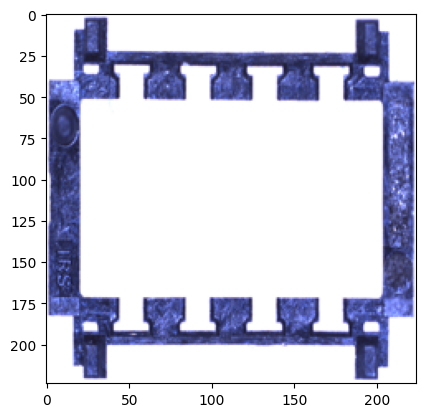

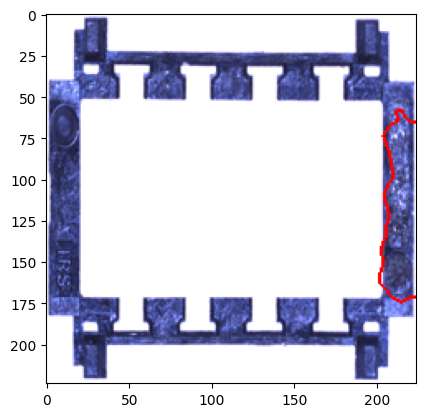

In [ ]:
t = time.time()
image_path = "./test/test_2.png"
predictions = inferencer.predict(image=image_path)
print("Thoi gian chay: ", time.time() - t)

print(predictions.pred_score, predictions.pred_label)
plt.imshow(predictions.image)
plt.figure()
plt.imshow(predictions.segmentations)

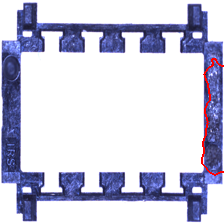

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
cv2_imshow(cv2.cvtColor(predictions.segmentations, cv2.COLOR_BGR2RGB))

# PatchCore

In [ ]:
from anomalib.models import Patchcore

model = Patchcore(
    backbone = "wide_resnet50_2",
    pre_trained = True,
    layers = [
        "layer2",
        "layer3"
    ],
    coreset_sampling_ratio = 0.1,
    num_neighbors = 9
    )

model.safetensors:   0%|          | 0.00/276M [00:00<?, ?B/s]

In [ ]:
datamodule = Folder(
    name = "MyDataset",
    root = "./MyDataset/",
    normal_dir = "train/good",
    abnormal_dir = "test/NG",
    normal_test_dir = "test/good",
    mask_dir = "ground_truth/NG",
    image_size = (256, 256),
    normal_split_ratio = 0,
    extensions = [".png"],
    train_batch_size = 32,
    eval_batch_size = 32,
    num_workers = 2,
    task = TaskType.SEGMENTATION,
    test_split_mode = "from_dir",
    test_split_ratio = 0,
    val_split_mode = "from_test",
    val_split_ratio = 0.3,
    seed = None,
)

In [ ]:
engine = Engine(
    normalization = NormalizationMethod.MIN_MAX,
    threshold = "F1AdaptiveThreshold",
    task = TaskType.SEGMENTATION,
    pixel_metrics = ["AUROC"],
    accelerator = "auto",
    check_val_every_n_epoch = 1,
    devices = 1,
    max_epochs = 1,
    num_sanity_val_steps = 0,
    val_check_interval = 1.0,
)

In [ ]:
engine.fit(model = model, datamodule = datamodule)

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: `Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
INFO:lightning.pytorch.utilities.rank_zero:`Trainer(val_check_interval=1.0)` was config

┏━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name                  ┃ Type                     ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model                 │ PatchcoreModel           │ 24.9 M │ train │
│ 1 │ _transform            │ Compose                  │      0 │ train │
│ 2 │ normalization_metrics │ MinMax                   │      0 │ train │
│ 3 │ image_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 4 │ pixel_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 5 │ image_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 6 │ pixel_metrics         │ AnomalibMetricCollection │      0 │ train │
└───┴───────────────────────┴──────────────────────────┴────────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99

Output()

Output()

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [ ]:
engine.test(model = model, datamodule = datamodule)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9523809552192688     │
│       image_F1Score       │    0.8999999761581421     │
│        pixel_AUROC        │    0.9805642366409302     │
└───────────────────────────┴───────────────────────────┘

[{'pixel_AUROC': 0.9805642366409302,
  'image_AUROC': 0.9523809552192688,
  'image_F1Score': 0.8999999761581421}]

In [ ]:
# Exporting model to OpenVINO
engine.export(
    model = model,
    export_type=ExportType.OPENVINO,
    export_root=str("./results/Patchcore"),
    # ckpt_path = "./results/Patchcore/MyDataset/v0/weights/lightning/model.ckpt",
)

/usr/local/lib/python3.10/dist-packages/anomalib/data/transforms/center_crop.py:57: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if image.numel() == 0:
/usr/local/lib/python3.10/dist-packages/anomalib/data/transforms/center_crop.py:61: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if crop_height > image_height or crop_width > image_width:
/usr/local/lib/python3.10/dist-packages/anomalib/data/transforms/center_crop.py:41: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this fun

PosixPath('results/Patchcore/weights/openvino/model.xml')

In [ ]:
inferencer = OpenVINOInferencer(
    path = "./results/Patchcore/weights/openvino/model.bin",  # Path to the OpenVINO IR model.
    metadata = "./results/Patchcore/weights/openvino/metadata.json",  # Path to the metadata file.
    device = "CPU",  # We would like to run it on an Intel CPU.
)

Thoi gian chay:  1.3217158317565918
0.6802394199426504 LabelName.ABNORMAL


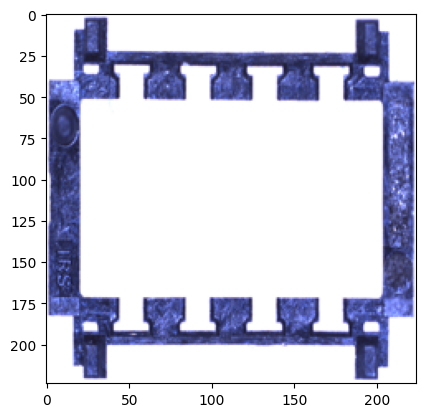

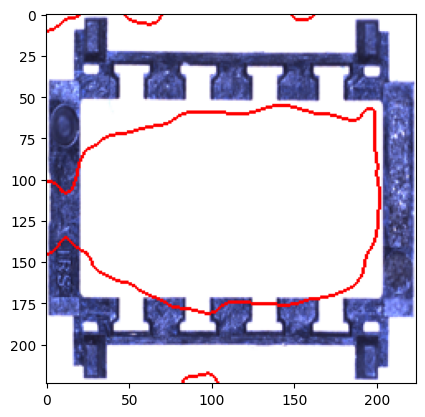

In [ ]:
t = time.time()
image_path = "./test/test_2.png"
predictions = inferencer.predict(image=image_path)
print("Thoi gian chay: ", time.time() - t)

print(predictions.pred_score, predictions.pred_label)
plt.imshow(predictions.image)
plt.figure()
plt.imshow(predictions.segmentations)

In [ ]:
cv2_imshow(cv2.cvtColor(predictions.segmentations, cv2.COLOR_BGR2RGB))

# FastFlow

In [ ]:
from anomalib.models import Fastflow
model = Fastflow(
    backbone="resnet18",
    flow_steps=8,
    )

In [ ]:
datamodule = Folder(
    name = "MyDataset",
    root = "./MyDataset/",
    normal_dir = "train/good",
    abnormal_dir = "test/NG",
    normal_test_dir = "test/good",
    mask_dir = "ground_truth/NG",
    image_size = (256, 256),
    normal_split_ratio = 0,
    extensions = [".png"],
    train_batch_size = 32,
    eval_batch_size = 32,
    num_workers = 2,
    task = TaskType.SEGMENTATION,
    # test_split_mode = "from_dir",
    # test_split_ratio = 0,
    val_split_mode = "from_test",
    val_split_ratio = 0.3,
    seed = None,
)

In [ ]:
callbacks = [
    ModelCheckpoint(
        mode="max",
        monitor="pixel_AUROC",
    ),
    EarlyStopping(
        monitor="pixel_AUROC",
        mode="max",
        patience=5,
    ),
]

engine = Engine(
    callbacks = callbacks,
    pixel_metrics = "AUROC",
    accelerator = "auto",  # \<"cpu", "gpu", "tpu", "ipu", "hpu", "auto">,
    devices = 1,
    logger = False,
    max_epochs = 500,
)

In [ ]:
engine.fit(datamodule = datamodule, model = model)

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name                  ┃ Type                     ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ loss                  │ FastflowLoss             │      0 │ train │
│ 1 │ _transform            │ Compose                  │      0 │ train │
│ 2 │ normalization_metrics │ MinMax                   │      0 │ train │
│ 3 │ image_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 4 │ pixel_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 5 │ image_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 6 │ pixel_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 7 │ model                 │ FastflowModel            │  7.7 M │ train │
└───┴───────────────────────┴──────────────────────────┴────────┴───────┘

Trainable params: 3.5 M                                                                                            
Non-trainable params: 4.2 M                                                                                        
Total params: 7.7 M                                                                                                
Total estimated model params size (MB): 30

Output()

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/core/module.py:518: You called `self.log('train_loss', 
..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`

In [ ]:
engine.test(datamodule = datamodule, model = model)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9801587462425232     │
│       image_F1Score       │    0.9318181872367859     │
│        pixel_AUROC        │     0.996231734752655     │
└───────────────────────────┴───────────────────────────┘

[{'pixel_AUROC': 0.996231734752655,
  'image_AUROC': 0.9801587462425232,
  'image_F1Score': 0.9318181872367859}]

In [ ]:
engine.export(
    model = model,
    export_type = ExportType.OPENVINO,
    export_root = str("./results/Fastflow"),
    # ckpt_path = "./results/Fastflow/MyDataset/v0/weights/lightning/model.ckpt",
)

/usr/local/lib/python3.10/dist-packages/torch/onnx/_internal/jit_utils.py:307: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ../torch/csrc/jit/passes/onnx/constant_fold.cpp:179.)
  _C._jit_pass_onnx_node_shape_type_inference(node, params_dict, opset_version)
/usr/local/lib/python3.10/dist-packages/torch/onnx/utils.py:702: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ../torch/csrc/jit/passes/onnx/constant_fold.cpp:179.)
  _C._jit_pass_onnx_graph_shape_type_inference(
/usr/local/lib/python3.10/dist-packages/torch/onnx/utils.py:1208: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ../torch/csrc/jit/passes/onnx/constant_fold.cpp:179.)
  _C._jit_pass_onnx_graph_shape_typ

PosixPath('results/Fastflow/weights/openvino/model.xml')

In [ ]:
inferencer = OpenVINOInferencer(
    path = "./results/Fastflow/weights/openvino/model.bin",  # Path to the OpenVINO IR model.
    metadata = "./results/Fastflow/weights/openvino/metadata.json",  # Path to the metadata file.
    device = "CPU",  # We would like to run it on an Intel CPU.
)

Thoi gian chay:  0.17890644073486328


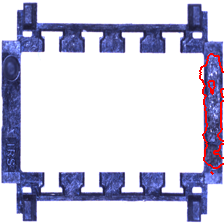

In [ ]:
t = time.time()
image_path = "./test/test_2.png"
predictions = inferencer.predict(image=image_path)
print("Thoi gian chay: ", time.time() - t)
cv2_imshow(cv2.cvtColor(predictions.segmentations, cv2.COLOR_BGR2RGB))

# CFA - train local khá tốt

In [ ]:
from anomalib.models import Cfa

model = Cfa(
    backbone = "wide_resnet50_2",
    gamma_c = 1,
    gamma_d = 1,
    num_nearest_neighbors = 3,
    num_hard_negative_features = 3,
    radius = 1.0e-05,
    )

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet50_2-95faca4d.pth
100%|██████████| 132M/132M [00:01<00:00, 73.1MB/s]


In [ ]:
callbacks = [
    EarlyStopping(
        patience = 5,
        monitor = "pixel_AUROC",
        mode = "max",
    ),
]

engine = Engine(
    callbacks = callbacks,
    pixel_metrics = ["AUROC"],
    max_epochs = 30,
)

In [ ]:
engine.fit(model=model, datamodule=datamodule)

In [ ]:
test_results = engine.test(model=model, datamodule=datamodule)

In [ ]:
engine.export(
    model=model,
    export_type=ExportType.OPENVINO,
    export_root=str("./results/Cfa"),
    ckpt_path = "./cfa.ckpt",
)

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warni

PosixPath('results/Cfa/weights/openvino/model.xml')

In [ ]:
inferencer = OpenVINOInferencer(
    path = "./results/Cfa/weights/openvino/model.bin",  # Path to the OpenVINO IR model.
    metadata = "./results/Cfa/weights/openvino/metadata.json",  # Path to the metadata file.
    device = "CPU",  # We would like to run it on an Intel CPU.
)

Thoi gian chay:  2.439755439758301


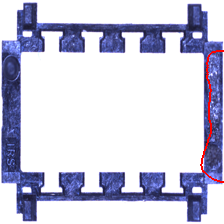

In [ ]:
t = time.time()
image_path = "./test/test_2.png"
predictions = inferencer.predict(image = image_path)
print("Thoi gian chay: ", time.time() - t)
cv2_imshow(cv2.cvtColor(predictions.segmentations, cv2.COLOR_BGR2RGB))

# CFlow

In [ ]:
from anomalib.models import Cflow

model = Cflow(
    backbone = "wide_resnet50_2",
    layers = [
        "layer2",
        "layer3",
        "layer4",
    ],
    pre_trained = True,
    fiber_batch_size = 64,
    decoder = "freia-cflow",
    condition_vector = 128,
    coupling_blocks = 8,
    clamp_alpha = 1.9,
    permute_soft = False,
    lr = 0.0001,
)

In [ ]:
datamodule = Folder(
    name = "MyDataset",
    root = "./MyDataset/",
    normal_dir = "train/good",
    abnormal_dir = "test/NG",
    normal_test_dir = "test/good",
    mask_dir = "ground_truth/NG",
    image_size = (256, 256),
    normal_split_ratio = 0,
    extensions = [".png"],
    train_batch_size = 32,
    eval_batch_size = 32,
    num_workers = 2,
    task = TaskType.SEGMENTATION,
    # test_split_mode = "from_dir",
    # test_split_ratio = 0,
    val_split_mode = "from_test",
    val_split_ratio = 0.3,
    seed = None,
)

In [ ]:
callbacks = [
    EarlyStopping(
        patience = 2,
        monitor = "pixel_AUROC",
        mode = "max",
    ),
]
engine = Engine(
    callbacks = callbacks,
    pixel_metrics = ["AUROC"],
    max_epochs = 50,
)

In [ ]:
engine.fit(model = model, datamodule = datamodule)

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name                  ┃ Type                     ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model                 │ CflowModel               │  236 M │ train │
│ 1 │ _transform            │ Compose                  │      0 │ train │
│ 2 │ normalization_metrics │ MinMax                   │      0 │ train │
│ 3 │ image_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 4 │ pixel_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 5 │ image_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 6 │ pixel_metrics         │ AnomalibMetricCollection │      0 │ train │
└───┴───────────────────────┴──────────────────────────┴────────┴───────┘

Trainable params: 81.6 M                                                                                           
Non-trainable params: 154 M                                                                                        
Total params: 236 M                                                                                                
Total estimated model params size (MB): 946

Output()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a 
cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: 
CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/core/module.py:518: You called `self.log('train_loss', 
..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`

In [ ]:
engine.test(model = model, datamodule = datamodule)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9999999403953552     │
│       image_F1Score       │            1.0            │
│        pixel_AUROC        │    0.9966330528259277     │
└───────────────────────────┴───────────────────────────┘

[{'pixel_AUROC': 0.9966330528259277,
  'image_AUROC': 0.9999999403953552,
  'image_F1Score': 1.0}]

In [ ]:
engine.export(
    model = model,
    export_type = ExportType.OPENVINO,
    export_root = str("./results/Cflow"),
    ckpt_path = "./results/Cflow/MyDataset/v0/weights/lightning/model.ckpt",
)

/usr/local/lib/python3.10/dist-packages/anomalib/models/image/cflow/torch_model.py:100: TracerWarning: torch.Tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  distribution = [torch.Tensor(0).to(images.device) for _ in self.pool_layers]
/usr/local/lib/python3.10/dist-packages/anomalib/models/image/cflow/torch_model.py:127: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  fiber_batches = embedding_length // self.fiber_batch_size + int(
/usr/local/lib/python3.10/dist-packages/anomalib/models/image/cflow/torch_model.py:132: TracerWarning: Convert

PosixPath('results/Cflow/weights/openvino/model.xml')

In [ ]:
inferencer = OpenVINOInferencer(
    path = "./results/Cflow/weights/openvino/model.bin",  # Path to the OpenVINO IR model.
    metadata = "./results/Cflow/weights/openvino/metadata.json",  # Path to the metadata file.
    device = "CPU",  # We would like to run it on an Intel CPU.
)

Thoi gian chay:  1.2065277099609375


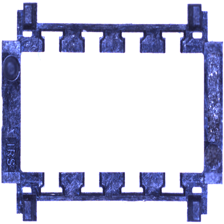

In [ ]:
t = time.time()
image_path = "./test/test_2.png"
predictions = inferencer.predict(image = image_path)
print("Thoi gian chay: ", time.time() - t)
cv2_imshow(cv2.cvtColor(predictions.segmentations, cv2.COLOR_BGR2RGB))

# CsFlow

In [ ]:
from anomalib.models import Csflow
model = Csflow(
    cross_conv_hidden_channels = 1024,
    n_coupling_blocks = 4,
    clamp = 3,
    num_channels = 3,
)

In [ ]:
datamodule = Folder(
    name = "MyDataset",
    root = "./MyDataset/",
    normal_dir = "train/good",
    abnormal_dir = "test/NG",
    normal_test_dir = "test/good",
    mask_dir = "ground_truth/NG",
    image_size = (256, 256),
    normal_split_ratio = 0,
    extensions = [".png"],
    train_batch_size = 32,
    eval_batch_size = 32,
    num_workers = 2,
    task = TaskType.SEGMENTATION,
    # test_split_mode = "from_dir",
    # test_split_ratio = 0,
    val_split_mode = "from_test",
    val_split_ratio = 0.3,
    seed = None,
)

In [ ]:
callbacks = [
    EarlyStopping(
        monitor="pixel_AUROC",
        mode="max",
        patience=3,
    ),
]

engine = Engine(
    callbacks=callbacks,
    pixel_metrics="AUROC",
    max_epochs = 240,
)

In [ ]:
engine.fit(model = model, datamodule = datamodule)

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
Downloading: "https://download.pytorch.org/models/efficientnet_b5_lukemelas-1a07897c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b5_lukemelas-1a07897c.pth
100%|██████████| 117M/117M [00:01

┏━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name                  ┃ Type                     ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ loss                  │ CsFlowLoss               │      0 │ train │
│ 1 │ _transform            │ Compose                  │      0 │ train │
│ 2 │ normalization_metrics │ MinMax                   │      0 │ train │
│ 3 │ image_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 4 │ pixel_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 5 │ image_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 6 │ pixel_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 7 │ model                 │ CsFlowModel              │  292 M │ train │
└───┴───────────────────────┴──────────────────────────┴────────┴───────┘

Trainable params: 275 M                                                                                            
Non-trainable params: 17.5 M                                                                                       
Total params: 292 M                                                                                                
Total estimated model params size (MB): 1.2 K

Output()

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/core/module.py:518: You called `self.log('train_loss', 
..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a 
cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: 
CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass

In [ ]:
engine.test(model = model, datamodule = datamodule)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.6136621236801147     │
│       image_F1Score       │    0.6521739363670349     │
│        pixel_AUROC        │    0.3475545048713684     │
└───────────────────────────┴───────────────────────────┘

[{'pixel_AUROC': 0.3475545048713684,
  'image_AUROC': 0.6136621236801147,
  'image_F1Score': 0.6521739363670349}]

In [ ]:
engine.export(
    model = model,
    export_type = ExportType.OPENVINO,
    export_root = str("./results/Csflow"),
    # ckpt_path = "./results/Csflow/MyDataset/v0/weights/lightning/model.ckpt",
)

PosixPath('results/Csflow/weights/openvino/model.xml')

In [ ]:
inferencer = OpenVINOInferencer(
    path = "./results/Csflow/weights/openvino/model.bin",  # Path to the OpenVINO IR model.
    metadata = "./results/Csflow/weights/openvino/metadata.json",  # Path to the metadata file.
    device = "CPU",  # We would like to run it on an Intel CPU.
)

Thoi gian chay:  6.190289735794067


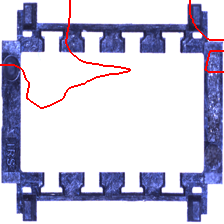

In [ ]:
t = time.time()
image_path = "./test/test_2.png"
predictions = inferencer.predict(image = image_path)
print("Thoi gian chay: ", time.time() - t)
cv2_imshow(cv2.cvtColor(predictions.segmentations, cv2.COLOR_BGR2RGB))

# DFM

In [ ]:
from anomalib.models import Dfm

model = Dfm(
    backbone = "resnet50",
    layer = "layer3",
    pre_trained = True,
    pooling_kernel_size = 4,
    pca_level = 0.97,
    score_type = "fre",
)

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [ ]:
datamodule = Folder(
    name = "MyDataset",
    root = "./MyDataset/",
    normal_dir = "train/good",
    abnormal_dir = "test/NG",
    normal_test_dir = "test/good",
    mask_dir = "ground_truth/NG",
    image_size = (256, 256),
    normal_split_ratio = 0,
    extensions = [".png"],
    train_batch_size = 32,
    eval_batch_size = 32,
    num_workers = 2,
    task = TaskType.SEGMENTATION,
    # test_split_mode = "from_dir",
    # test_split_ratio = 0,
    val_split_mode = "from_test",
    val_split_ratio = 0.3,
    seed = None,
)

In [ ]:
engine = Engine(
    pixel_metrics = ["AUROC"],
)

In [ ]:
engine.fit(model = model, datamodule = datamodule)

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/core/optimi

┏━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name                  ┃ Type                     ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model                 │ DFMModel                 │  8.5 M │ train │
│ 1 │ _transform            │ Compose                  │      0 │ train │
│ 2 │ normalization_metrics │ MinMax                   │      0 │ train │
│ 3 │ image_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 4 │ pixel_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 5 │ image_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 6 │ pixel_metrics         │ AnomalibMetricCollection │      0 │ train │
└───┴───────────────────────┴──────────────────────────┴────────┴───────┘

Trainable params: 8.5 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 8.5 M                                                                                                
Total estimated model params size (MB): 34

Output()

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [ ]:
engine.test(model = model, datamodule = datamodule)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.8951246738433838     │
│       image_F1Score       │    0.9318181872367859     │
│        pixel_AUROC        │    0.9659289121627808     │
└───────────────────────────┴───────────────────────────┘

[{'pixel_AUROC': 0.9659289121627808,
  'image_AUROC': 0.8951246738433838,
  'image_F1Score': 0.9318181872367859}]

In [ ]:
engine.export(
    model = model,
    export_type=ExportType.OPENVINO,
    export_root=str("./results/Dfm"),
    # ckpt_path = "./results/Dfm/MyDataset/v0/weights/lightning/model.ckpt",
)

/usr/local/lib/python3.10/dist-packages/anomalib/models/image/dfm/torch_model.py:160: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. Recommended usage would be tensor.shape[0]. Passing a tensor of different shape might lead to errors or silently give incorrect results.
  batch_size = len(features)


PosixPath('results/Dfm/weights/openvino/model.xml')

In [ ]:
inferencer = OpenVINOInferencer(
    path = "./results/Dfm/weights/openvino/model.bin",  # Path to the OpenVINO IR model.
    metadata = "./results/Dfm/weights/openvino/metadata.json",  # Path to the metadata file.
    device = "CPU",  # We would like to run it on an Intel CPU.
)

In [ ]:
t = time.time()
image_path = "./test/test_2.png"
predictions = inferencer.predict(image = image_path)
print("Thoi gian chay: ", time.time() - t)
cv2_imshow(cv2.cvtColor(predictions.segmentations, cv2.COLOR_BGR2RGB))

Thoi gian chay:  0.4212687015533447


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


# DRAEM - kết quả không tốt

CUDA out of memory. Tried to allocate 512.00 MiB. GPU

Sửa train_batch_size = 1 ở train local

In [ ]:
from anomalib.models import Draem

model = Draem(
    beta = (0.1, 1.0),
    enable_sspcab = False,
    sspcab_lambda = 0.1,
    anomaly_source_path = "null",
)

In [ ]:
callbacks = [
    EarlyStopping(
        patience = 20,
        monitor = "pixel_AUROC",
        mode = "max",
    ),
]
engine = Engine(
    callbacks = callbacks,
    pixel_metrics = ["AUROC"],
    max_epochs = 700,
)

In [ ]:
engine.fit(model=model, datamodule=datamodule)

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


┏━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name                  ┃ Type                     ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model                 │ DraemModel               │ 97.4 M │ train │
│ 1 │ loss                  │ DraemLoss                │      0 │ train │
│ 2 │ _transform            │ Compose                  │      0 │ train │
│ 3 │ normalization_metrics │ MinMax                   │      0 │ train │
│ 4 │ image_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 5 │ pixel_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 6 │ image_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 7 │ pixel_metrics         │ AnomalibMetricCollection │      0 │ train │
└───┴───────────────────────┴──────────────────────────┴────────┴───────┘

Trainable params: 97.4 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 97.4 M                                                                                               
Total estimated model params size (MB): 389

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Output()

In [ ]:
test_results = engine.test(model=model, datamodule=datamodule)

In [ ]:
engine.export(
    model=model,
    export_type=ExportType.OPENVINO,
    export_root=str("./results/Draem"),
    ckpt_path = "./draem.ckpt",
)

PosixPath('results/Draem/weights/openvino/model.xml')

In [ ]:
inferencer = OpenVINOInferencer(
    path = "./results/Draem/weights/openvino/model.bin",  # Path to the OpenVINO IR model.
    metadata = "./results/Draem/weights/openvino/metadata.json",  # Path to the metadata file.
    device = "CPU",  # We would like to run it on an Intel CPU.
)

Thoi gian chay:  6.685055255889893


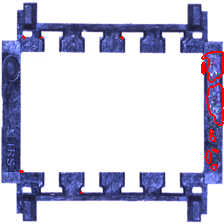

In [ ]:
t = time.time()
image_path = "./test/test_2.png"
predictions = inferencer.predict(image = image_path)
print("Thoi gian chay: ", time.time() - t)
cv2_imshow(cv2.cvtColor(predictions.segmentations, cv2.COLOR_BGR2RGB))

# Dsr - maximum recursion depth exceeded while calling a Python object

train_batch_size = 1

In [ ]:
from anomalib.models import Dsr
model = Dsr(
    latent_anomaly_strength = 0.2,
    upsampling_train_ratio = 0.7,
)

In [ ]:
engine = Engine(  # Don't add extra parameter here.
    max_epochs = 700,
)

engine.fit(datamodule=datamodule, model=model)

In [ ]:
engine.test(datamodule=datamodule, model=model)

# EfficientAD - maximum recursion depth exceeded while calling a Python object

In [ ]:
from anomalib.models import EfficientAd
model = EfficientAd(
    teacher_out_channels = 384,
    # model_size = "S",
    lr = 0.0001,
    weight_decay = 1.0e-05,
    padding = False,
    pad_maps = True,
)

In [ ]:
engine = Engine(
    max_epochs = 1000,
    max_steps = 70000,
    pixel_metrics = ["AUROC"],
)

engine.fit(datamodule=datamodule, model=model)

In [ ]:
engine.test(datamodule=datamodule, model=model)

# FRE - quá tốn GPU - kaggle

In [ ]:
from anomalib.models import Fre

model = Fre(
    backbone = "resnet50",
    layer = "layer3",
    pre_trained = True,
    pooling_kernel_size = 2,
    input_dim = 65536,
    latent_dim = 220,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [ ]:
engine = Engine(
    max_epochs = 220,
)

In [ ]:
engine.fit(model=model, datamodule=datamodule)

In [ ]:
test_results = engine.test(model=model, datamodule=datamodule)

In [ ]:
openvino_model_path = engine.export(
    model=model,
    export_type=ExportType.OPENVINO,
    export_root=str("./results/Fre"),
    ckpt_path = "./results/Fre/model.ckpt",
)

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:nncf:NNCF initialized successfully. Supported frameworks detected: torch, tensorflow, onnx, openvino


/usr/local/lib/python3.10/dist-packages/anomalib/models/image/fre/torch_model.py:91: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. Recommended usage would be tensor.shape[0]. Passing a tensor of different shape might lead to errors or silently give incorrect results.
  batch_size = len(features_in)


# Reverse Distillation

In [ ]:
from anomalib.models import ReverseDistillation

model = ReverseDistillation(
    backbone = "wide_resnet50_2",
    layers = [
      "layer1",
      "layer2",
      "layer3",],
    anomaly_map_mode = "add",
    pre_trained = True,
)

In [ ]:
datamodule = Folder(
    name = "MyDataset",
    root = "./MyDataset/",
    normal_dir = "train/good",
    abnormal_dir = "test/NG",
    normal_test_dir = "test/good",
    mask_dir = "ground_truth/NG",
    image_size = (256, 256),
    normal_split_ratio = 0,
    extensions = [".png"],
    train_batch_size = 32,
    eval_batch_size = 32,
    num_workers = 2,
    task = TaskType.SEGMENTATION,
    # test_split_mode = "from_dir",
    # test_split_ratio = 0,
    val_split_mode = "from_test",
    val_split_ratio = 0.3,
    seed = None,
)

In [ ]:
callbacks = [
    EarlyStopping(
        patience = 3,
        monitor = "pixel_AUROC",
        mode = "max",
    ),
]
engine = Engine(
    callbacks = callbacks,
    pixel_metrics = ["AUROC"],
    max_epochs = 200,
    check_val_every_n_epoch = 200,
)

In [ ]:
engine.fit(model = model, datamodule = datamodule)

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name                  ┃ Type                     ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ loss                  │ ReverseDistillationLoss  │      0 │ train │
│ 1 │ _transform            │ Compose                  │      0 │ train │
│ 2 │ normalization_metrics │ MinMax                   │      0 │ train │
│ 3 │ image_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 4 │ pixel_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 5 │ image_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 6 │ pixel_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 7 │ model                 │ ReverseDistillationModel │ 89.0 M │ train │
└───┴───────────────────────┴──────────────────────────┴────────┴───────┘

Trainable params: 89.0 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 89.0 M                                                                                               
Total estimated model params size (MB): 356

Output()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a 
cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: 
CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/core/module.py:518: You called `self.log('train_loss', 
..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a 
cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: 
CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


In [ ]:
engine.test(model = model, datamodule = datamodule)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9841269254684448     │
│       image_F1Score       │    0.9397590160369873     │
│        pixel_AUROC        │    0.9969499111175537     │
└───────────────────────────┴───────────────────────────┘

[{'pixel_AUROC': 0.9969499111175537,
  'image_AUROC': 0.9841269254684448,
  'image_F1Score': 0.9397590160369873}]

In [ ]:
engine.export(
    model = model,
    export_type = ExportType.OPENVINO,
    export_root = str("./results/ReverseDistillation"),
    # ckpt_path = "./results/ReverseDistillation/MyDataset/v0/weights/lightning/model.ckpt",
)

/usr/local/lib/python3.10/dist-packages/kornia/filters/kernels.py:652: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  sigma = tensor([sigma], device=device, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/kornia/core/check.py:77: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if x_shape_to_check[i] != dim:
/usr/local/lib/python3.10/dist-packages/kornia/filters/kernels.py:92: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function t

PosixPath('results/ReverseDistillation/weights/openvino/model.xml')

In [ ]:
inferencer = OpenVINOInferencer(
    path = "./results/ReverseDistillation/weights/openvino/model.bin",  # Path to the OpenVINO IR model.
    metadata = "./results/ReverseDistillation/weights/openvino/metadata.json",  # Path to the metadata file.
    device = "CPU",  # We would like to run it on an Intel CPU.
)

Thoi gian chay:  1.2684812545776367


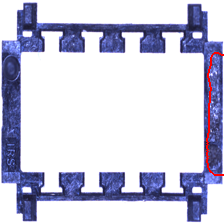

In [ ]:
t = time.time()
image_path = "./test/test_2.png"
predictions = inferencer.predict(image = image_path)
print("Thoi gian chay: ", time.time() - t)
cv2_imshow(cv2.cvtColor(predictions.segmentations, cv2.COLOR_BGR2RGB))

# STFPM - kết quả tệ

In [ ]:
from anomalib.models import Stfpm

model = Stfpm(
    backbone = "resnet18",
    layers = [
      "layer1",
      "layer2",
      "layer3",],
    )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [ ]:
datamodule = Folder(
    name = "MyDataset",
    root = "./MyDataset/",
    normal_dir = "train/good",
    abnormal_dir = "test/NG",
    normal_test_dir = "test/good",
    mask_dir = "ground_truth/NG",
    image_size = (256, 256),
    normal_split_ratio = 0,
    extensions = [".png"],
    train_batch_size = 32,
    eval_batch_size = 32,
    num_workers = 2,
    task = TaskType.SEGMENTATION,
    # test_split_mode = "from_dir",
    # test_split_ratio = 0,
    val_split_mode = "from_test",
    val_split_ratio = 0.3,
    seed = None,
)

In [ ]:
callbacks = [
    EarlyStopping(
        patience = 5,
        monitor = "pixel_AUROC",
        mode = "max",
    ),
]
engine = Engine(
    callbacks = callbacks,
    pixel_metrics = ["AUROC"],
    max_epochs = 100,
)

In [ ]:
engine.fit(model=model, datamodule=datamodule)

In [ ]:
test_results = engine.test(model=model, datamodule=datamodule)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.4554988741874695     │
│       image_F1Score       │    0.6557376980781555     │
│        pixel_AUROC        │    0.8833591341972351     │
└───────────────────────────┴───────────────────────────┘

In [ ]:
engine.export(
    model = model,
    export_type = ExportType.OPENVINO,
    export_root = str("./results/Stfpm"),
    ckpt_path = "./results/Stfpm/MyDataset/v0/weights/lightning/model.ckpt",
)

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:nncf:NNCF initialized successfully. Supported frameworks detected: torch, tensorflow, onnx, openvino


PosixPath('results/Stfpm/weights/openvino/model.xml')

In [ ]:
inferencer = OpenVINOInferencer(
    path = "./results/Stfpm/weights/openvino/model.bin",  # Path to the OpenVINO IR model.
    metadata = "./results/Stfpm/weights/openvino/metadata.json",  # Path to the metadata file.
    device = "CPU",  # We would like to run it on an Intel CPU.
)

Thoi gian chay:  0.23079371452331543


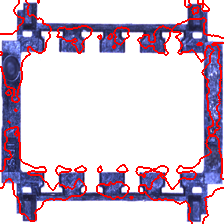

In [ ]:
t = time.time()
image_path = "./test/test_2.png"
predictions = inferencer.predict(image = image_path)
print("Thoi gian chay: ", time.time() - t)
cv2_imshow(cv2.cvtColor(predictions.segmentations, cv2.COLOR_BGR2RGB))

# UFlow

In [ ]:
from anomalib.models import Uflow

model = Uflow(
    flow_steps = 4,
    permute_soft = False,
    affine_clamp = 2.0,
    affine_subnet_channels_ratio = 1.0,
    backbone = "mcait", # official: mcait, other extractors tested: resnet18, wide_resnet50_2. Could use others...
    )

In [ ]:
datamodule = Folder(
    name = "MyDataset",
    root = "./MyDataset/",
    normal_dir = "train/good",
    abnormal_dir = "test/NG",
    normal_test_dir = "test/good",
    mask_dir = "ground_truth/NG",
    image_size = (448, 448),
    normal_split_ratio = 0,
    extensions = [".png"],
    train_batch_size = 32,
    eval_batch_size = 32,
    num_workers = 2,
    task = TaskType.SEGMENTATION,
    # test_split_mode = "from_dir",
    # test_split_ratio = 0,
    val_split_mode = "from_test",
    val_split_ratio = 0.3,
    seed = None,
)

In [ ]:
callbacks = [
    EarlyStopping(
        patience = 20,
        monitor = "pixel_AUROC",
        mode = "max",
    ),
]
engine = Engine(
    callbacks = callbacks,
    pixel_metrics = ["AUROC"],
    max_epochs = 200,
    log_every_n_steps = 50,
)

In [ ]:
engine.fit(model=model, datamodule=datamodule)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name                  ┃ Type                     ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ loss                  │ UFlowLoss                │      0 │ train │
│ 1 │ _transform            │ Compose                  │      0 │ train │
│ 2 │ normalization_metrics │ MinMax                   │      0 │ train │
│ 3 │ image_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 4 │ pixel_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 5 │ image_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 6 │ pixel_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 7 │ model                 │ UflowModel               │  422 M │ train │
└───┴───────────────────────┴──────────────────────────┴────────┴───────┘

Trainable params: 12.2 M                                                                                           
Non-trainable params: 409 M                                                                                        
Total params: 422 M                                                                                                
Total estimated model params size (MB): 1.7 K

Output()

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/core/module.py:518: You called `self.log('loss', ..., 
logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`

In [ ]:
engine.test(model=model, datamodule=datamodule)

In [ ]:
engine.export(
    model=model,
    export_type=ExportType.OPENVINO,
    export_root=str("./results/Uflow"),
    ckpt_path = "./Uflow.ckpt",
)

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in

model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/188M [00:00<?, ?B/s]

INFO:nncf:NNCF initialized successfully. Supported frameworks detected: torch, tensorflow, onnx, openvino


/usr/local/lib/python3.10/dist-packages/torch/__init__.py:1559: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert condition, message
/usr/local/lib/python3.10/dist-packages/anomalib/models/image/uflow/feature_extraction.py:141: TracerWarning: torch.Tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  img_sub = F.interpolate(torch.Tensor(img), size=(224, 224), mode="bicubic", align_corners=True)


PosixPath('results/Uflow/weights/openvino/model.xml')

In [ ]:
inferencer = OpenVINOInferencer(
    path = "./results/Uflow/weights/openvino/model.bin",  # Path to the OpenVINO IR model.
    metadata = "./results/Uflow/weights/openvino/metadata.json",  # Path to the metadata file.
    device = "CPU",  # We would like to run it on an Intel CPU.
)

Thoi gian chay:  17.50084686279297


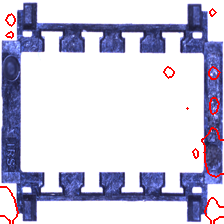

In [ ]:
t = time.time()
image_path = "./test/test_2.png"
predictions = inferencer.predict(image = image_path)
print("Thoi gian chay: ", time.time() - t)
cv2_imshow(cv2.cvtColor(predictions.segmentations, cv2.COLOR_BGR2RGB))